In [608]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from scipy import stats 
import os

In [609]:
path = 'C:/Users/66626/Project/Data Set/'
file1 = path + 'olist_customers_dataset.csv'
file2 = path + 'olist_geolocation_dataset.csv'
file3 = path + 'olist_order_items_dataset.csv'
file4 = path + 'olist_order_payments_dataset.csv'
file5 = path + 'olist_order_reviews_dataset.csv'
file6 = path + 'olist_orders_dataset.csv'
file7 = path + 'olist_products_dataset.csv'
file8 = path + 'olist_sellers_dataset.csv'
file9 = path + 'product_category_name_translation.csv'

In [610]:
df_customers = pd.read_csv(file1)
df_geolocation = pd.read_csv(file2)
df_item = pd.read_csv(file3)
df_order_pay = pd.read_csv(file4)
df_reviews = pd.read_csv(file5)
df_orders = pd.read_csv(file6)
df_products = pd.read_csv(file7)
df_sellers = pd.read_csv(file8)
df_category = pd.read_csv(file9)

### Customer Table (olist_customers_dataset)

In [611]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [612]:
print("Customers Table contains", df_customers.shape[0], "rows and", df_customers.shape[1], "columns.")

Customers Table contains 99441 rows and 5 columns.


In [613]:
# checking for missing values
df_customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [614]:
#ตรวจชนิดของข้อมูล
#data.dtypes
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [615]:
#show unique values in customer_zip_code_prefix column
#df_customers['customer_zip_code_prefix'].value_counts()
df_customers['customer_zip_code_prefix'].unique()

array([14409,  9790,  1151, ...,  5538, 74980, 99043], dtype=int64)

In [616]:
df_customers['customer_zip_code_prefix'] = df_customers['customer_zip_code_prefix'].astype('category')
df_customers['customer_state'] = df_customers['customer_state'].astype('category')
df_customers['customer_city'] = df_customers['customer_city'].astype('category')

In [617]:
df_customers['customer_zip_code_prefix'].unique()

[14409, 9790, 1151, 8775, 13056, ..., 87145, 98860, 5538, 74980, 99043]
Length: 14994
Categories (14994, int64): [1003, 1004, 1005, 1006, ..., 99965, 99970, 99980, 99990]

In [618]:
# dropping columns with unnecessary column
df_customers = df_customers.drop(columns=['customer_unique_id'])

In [619]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   customer_id               99441 non-null  object  
 1   customer_zip_code_prefix  99441 non-null  category
 2   customer_city             99441 non-null  category
 3   customer_state            99441 non-null  category
dtypes: category(3), object(1)
memory usage: 2.0+ MB


In [620]:
#check duplicated row
#By setting keep on False, all duplicates are True.
df_customers.duplicated(keep=False).sum()

0

In [621]:
# show basic statistic
df_customers.describe()

,customer_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441,99441
unique,99441,14994,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,22790,sao paulo,SP
freq,1,142,15540,41746


In [622]:
#To select pandas categorical columns, use 'category' # พยายามเน้นที่เป็นตัวหนังสือก่อน
#The top is the most common value. 
#The freq is the most common value’s frequency.
df_customers.describe(include=['category'])

,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441
unique,14994,4119,27
top,22790,sao paulo,SP
freq,142,15540,41746


Text(0, 0.5, 'No. of Customers')

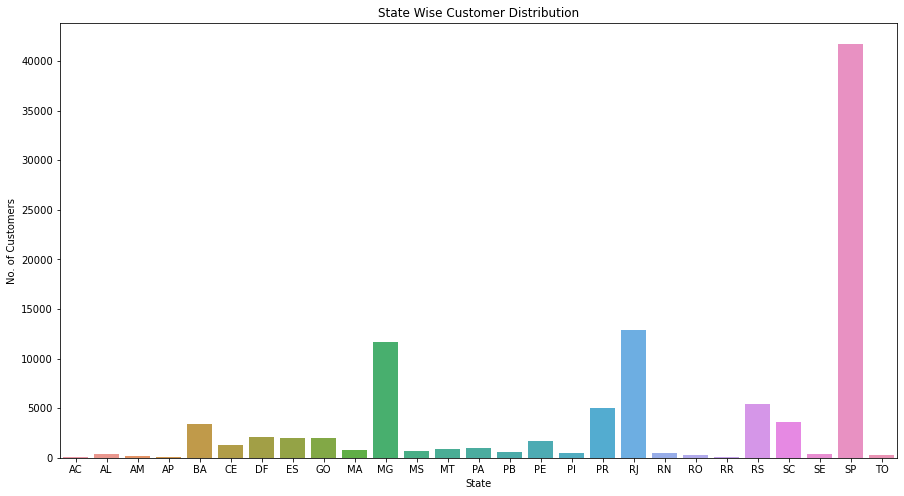

In [623]:
# plotting state wise customer distribution
plt.figure(figsize=(15,8))
sns.countplot(x='customer_state', data=df_customers)
plt.title('State Wise Customer Distribution')
plt.xlabel('State')
plt.ylabel('No. of Customers')

### Geo Table (olist_geolocation_dataset)

In [624]:
# viewing the first 5 rows of the dataset
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [625]:
print("Geolocation Table contains", df_geolocation.shape[0], "rows and", df_geolocation.shape[1], "columns.")

Geolocation Table contains 1000163 rows and 5 columns.


In [626]:
df_geolocation.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [627]:
#ตรวจชนิดของข้อมูล
df_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [628]:
df_geolocation['geolocation_zip_code_prefix'] = df_geolocation['geolocation_zip_code_prefix'].astype('category')
df_geolocation['geolocation_state'] = df_geolocation['geolocation_state'].astype('category')
df_geolocation['geolocation_city'] = df_geolocation['geolocation_city'].astype('category')

In [629]:
df_geolocation['geolocation_city'].unique()

['sao paulo', 'são paulo', 'sao bernardo do campo', 'jundiaí', 'taboão da serra', ..., 'ibiaçá', 'santa cecilia do sul', 'ciríaco', 'estação', 'vila lângaro']
Length: 8011
Categories (8011, object): ['* cidade', '...arraial do cabo', '4o. centenario', '4º centenario', ..., 'ângulo', 'érico cardoso', 'óbidos', 'óleo']

In [630]:
#check duplicated row
#By setting keep on False, all duplicates are True.
df_geolocation.duplicated(keep=False).sum()

390005

In [631]:
#แสดง row ที่ซ้ำกัน
df_geolocation[df_geolocation.duplicated(keep=False)]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


In [632]:
#drop the duplicate row
df_geolocation.drop_duplicates(inplace=True)

In [633]:
df_geolocation.shape

(738332, 5)

In [634]:
df_geolocation.duplicated(keep=False).sum()

0

In [635]:
df_geolocation.describe(include=['category'])

,geolocation_zip_code_prefix,geolocation_city,geolocation_state
count,738332,738332,738332
unique,19015,8011,27
top,38400,sao paulo,SP
freq,779,79927,285976


In [636]:
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


Text(0, 0.5, 'No. of record in each state')

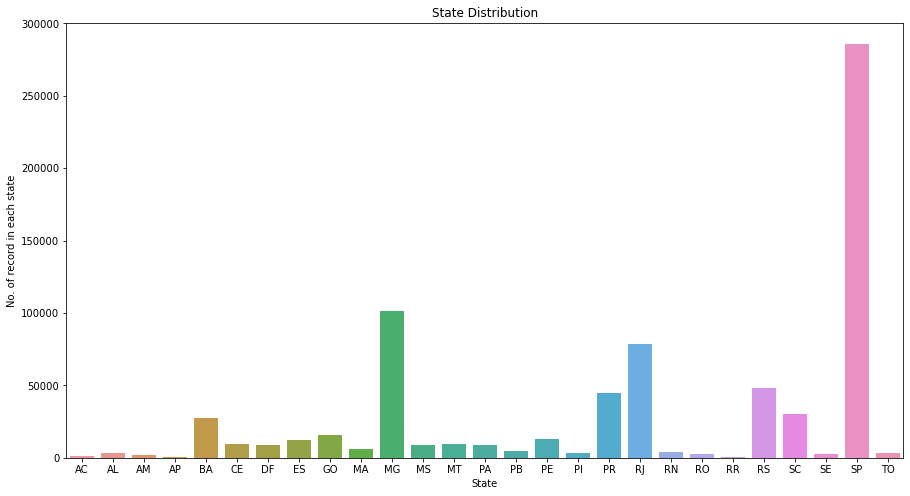

In [637]:
# plotting state distribution
plt.figure(figsize=(15,8))
sns.countplot(x='geolocation_state', data=df_geolocation)
plt.title('State Distribution')
plt.xlabel('State')
plt.ylabel('No. of record in each state')

### Item Table (olist_order_items_dataset)

In [638]:
# viewing the first 5 rows of the dataset
df_item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [639]:
df_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [640]:
df_item["shipping_limit_date"] = pd.to_datetime(df_item["shipping_limit_date"], format='%Y-%m-%d %H:%M:%S')

In [641]:
df_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [642]:
#check duplicated row
#By setting keep on False, all duplicates are True.
df_item.duplicated(keep=False).sum()

0

In [643]:
# checking for missing values
df_item.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [644]:
df_item.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [645]:
df_item.describe(include=['object'])

,order_id,product_id,seller_id
count,112650,112650,112650
unique,98666,32951,3095
top,8272b63d03f5f79c56e9e4120aec44ef,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0
freq,21,527,2033


Text(0.5, 0, 'Price')

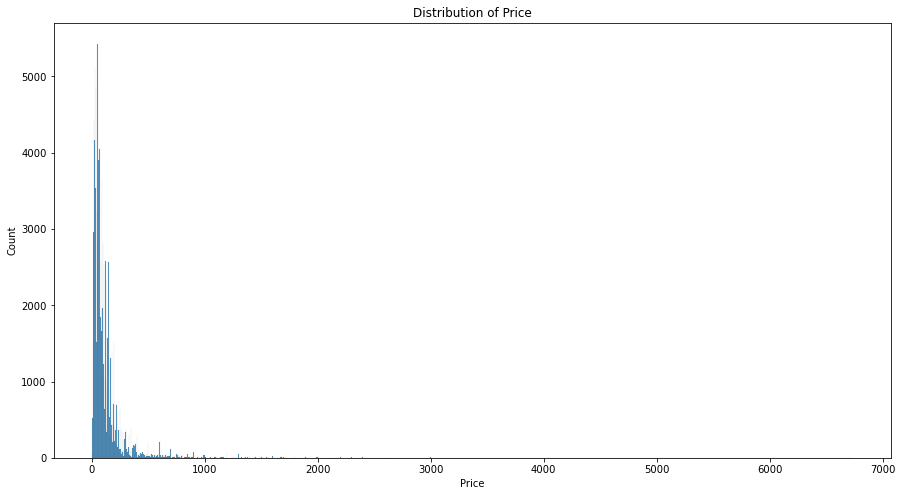

In [646]:
# plotting the distribution of price
plt.figure(figsize=(15,8))
sns.histplot(x='price', data=df_item)
plt.title('Distribution of Price')
plt.xlabel('Price')

Text(0.5, 0, 'Freight Value')

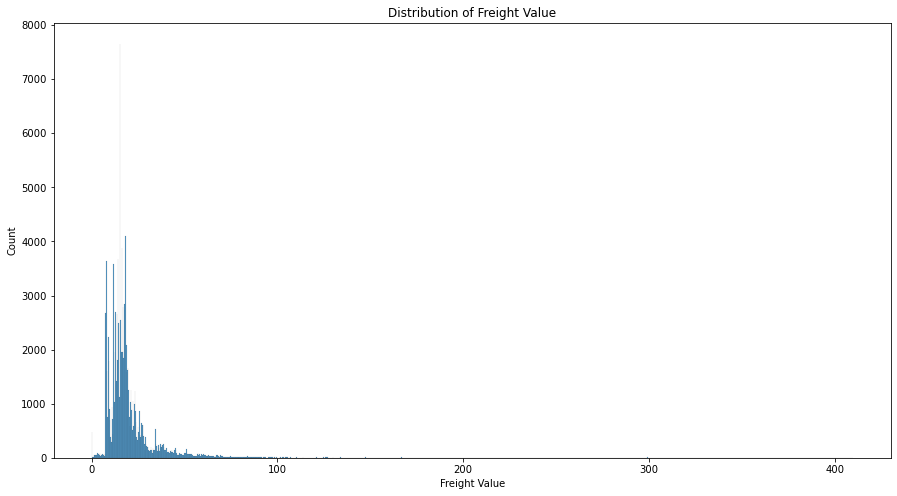

In [647]:
# plotting the distribution of freight value
plt.figure(figsize=(15,8))
sns.histplot(x='freight_value', data=df_item)
plt.title('Distribution of Freight Value')
plt.xlabel('Freight Value')

### Payment Table (olist_order_payments_dataset)

In [648]:
# viewing the first 5 rows of the dataset
df_order_pay.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [649]:
# checking for missing values
df_order_pay.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [650]:
df_order_pay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [651]:
df_order_pay['payment_installments'].unique()

array([ 8,  1,  2,  3,  6,  5,  4, 10,  7, 12,  9, 13, 15, 24, 11, 18, 14,
       20, 21, 17, 22,  0, 16, 23], dtype=int64)

In [652]:
df_order_pay['payment_sequential'].unique()

array([ 1,  2,  4,  5,  3,  8,  6,  7, 10, 11, 17, 19, 27, 12,  9, 15, 13,
       14, 16, 25, 22, 26, 29, 28, 18, 21, 24, 23, 20], dtype=int64)

In [653]:
df_order_pay['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [654]:
df_order_pay['payment_type'] = df_order_pay['payment_type'].astype('category')

In [655]:
df_order_pay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   order_id              103886 non-null  object  
 1   payment_sequential    103886 non-null  int64   
 2   payment_type          103886 non-null  category
 3   payment_installments  103886 non-null  int64   
 4   payment_value         103886 non-null  float64 
dtypes: category(1), float64(1), int64(2), object(1)
memory usage: 3.3+ MB


In [656]:
#check duplicated row
#By setting keep on False, all duplicates are True.
df_order_pay.duplicated(keep=False).sum()

0

In [657]:
df_order_pay.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [658]:
df_order_pay.describe(include=['category'])

,payment_type
count,103886
unique,5
top,credit_card
freq,76795


In [659]:
df_order_pay.describe(include=['object'])

,order_id
count,103886
unique,99440
top,fa65dad1b0e818e3ccc5cb0e39231352
freq,29


Text(0, 0.5, 'No. of Customers')

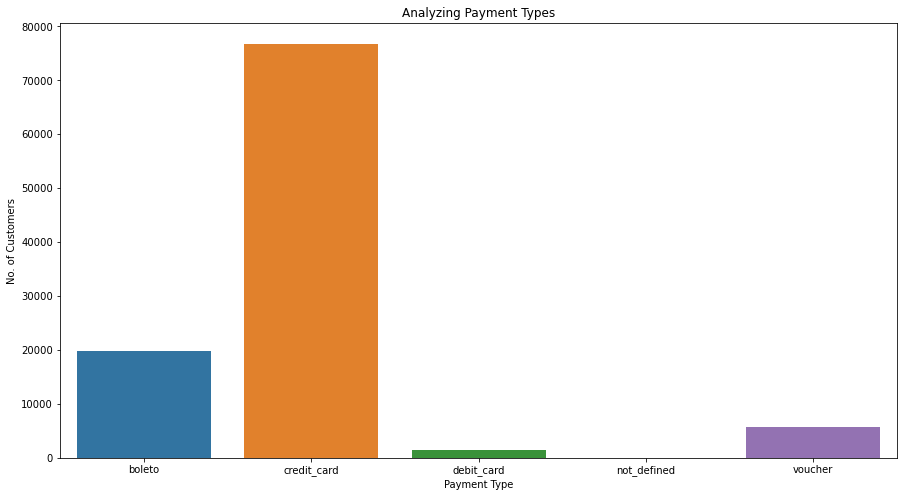

In [660]:
# analyzing the payment methods chosen by different customers
plt.figure(figsize=(15,8))
sns.countplot(x='payment_type', data=df_order_pay)
plt.title('Analyzing Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('No. of Customers')

In [661]:
df_order_pay['payment_type'].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

Text(0, 0.5, 'No. of Customers')

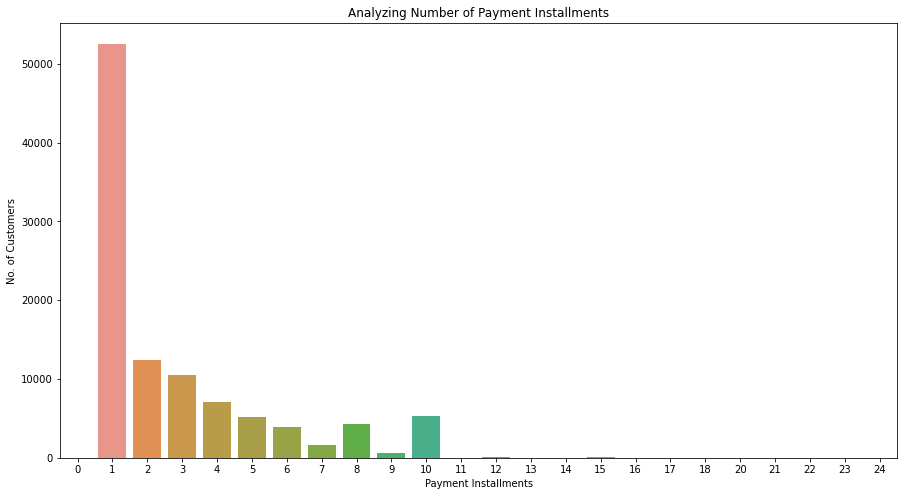

In [662]:
# plotting the distribution of number of installments
plt.figure(figsize=(15,8))
sns.countplot(x='payment_installments', data=df_order_pay)
plt.title('Analyzing Number of Payment Installments')
plt.xlabel('Payment Installments')
plt.ylabel('No. of Customers')

In [663]:
df_order_pay['payment_installments'].value_counts()

1     52546
2     12413
3     10461
4      7098
10     5328
5      5239
8      4268
6      3920
7      1626
9       644
12      133
15       74
18       27
11       23
24       18
20       17
13       16
14       15
17        8
16        5
21        3
0         2
22        1
23        1
Name: payment_installments, dtype: int64

Text(0, 0.5, 'No. of Orders')

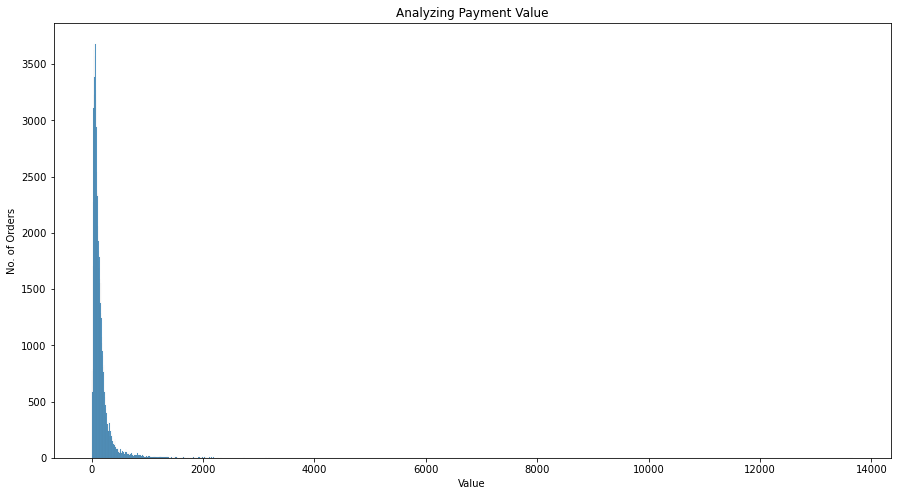

In [664]:
# plotting the distribution of payment value
plt.figure(figsize=(15,8))
sns.histplot(x='payment_value', data=df_order_pay)
plt.title('Analyzing Payment Value')
plt.xlabel('Value')
plt.ylabel('No. of Orders')

Text(0, 0.5, '')

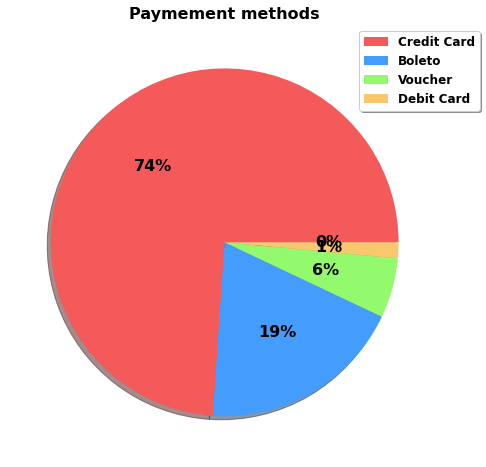

In [665]:
fig, ax = plt.subplots(figsize=(9, 8), subplot_kw=dict(aspect="equal"))
colors = ['#f45a5a', '#449dfc', '#93f96d', '#f9c86d']
legend = ["Credit Card", "Boleto", "Voucher", "Debit Card"]

p = df_order_pay["payment_type"][df_order_pay["payment_type"] != "not_defined"].value_counts()
p.plot(kind="pie", legend=False, labels=None, startangle=0, autopct='%1.0f%%', pctdistance=0.6, shadow=True, textprops={'weight':'bold', 'fontsize':16}, 
       colors=colors, ax=ax)
ax.legend(legend, loc='best', shadow=True, prop={'weight':'bold', 'size':12}, bbox_to_anchor=(0.6, 0, 0.5,1))
plt.title("Paymement methods", fontweight='bold', size=16)
plt.ylabel("")

### Review Table (olist_order_reviews_dataset)

In [666]:
# viewing the first 5 rows of the dataset
df_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [667]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [668]:
df_reviews["review_creation_date"] = pd.to_datetime(df_reviews["review_creation_date"], format='%Y-%m-%d %H:%M:%S')
df_reviews["review_answer_timestamp"] = pd.to_datetime(df_reviews["review_answer_timestamp"], format='%Y-%m-%d %H:%M:%S')

In [669]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   review_id                100000 non-null  object        
 1   order_id                 100000 non-null  object        
 2   review_score             100000 non-null  int64         
 3   review_comment_title     11715 non-null   object        
 4   review_comment_message   41753 non-null   object        
 5   review_creation_date     100000 non-null  datetime64[ns]
 6   review_answer_timestamp  100000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [670]:
df_reviews['review_comment_title'].value_counts()

Recomendo                    426
recomendo                    346
Bom                          294
super recomendo              271
Excelente                    248
                            ... 
produto com lacre violado      1
Atraso Entrega                 1
Top Show                       1
Foi cancelado                  1
Foto enganosa                  1
Name: review_comment_title, Length: 4600, dtype: int64

In [671]:
#check duplicated row
#By setting keep on False, all duplicates are True.
df_reviews.duplicated(keep=False).sum()

0

In [672]:
df_reviews.shape

(100000, 7)

In [673]:
df_reviews.describe()

,review_score
count,100000.000000
mean,4.070890
std,1.359663
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [674]:
df_reviews.describe(include=['object'])

,review_id,order_id,review_comment_title,review_comment_message
count,100000,100000,11715,41753
unique,99173,99441,4600,36921
top,2172867fd5b1a55f98fe4608e1547b4b,03c939fd7fd3b38f8485a0f95798f1f6,Recomendo,Muito bom
freq,3,3,426,230


In [675]:
# dropping columns with many missing values
df_reviews = df_reviews.drop(columns=['review_comment_title', 'review_comment_message'])

Text(0, 0.5, 'No. of Reviews')

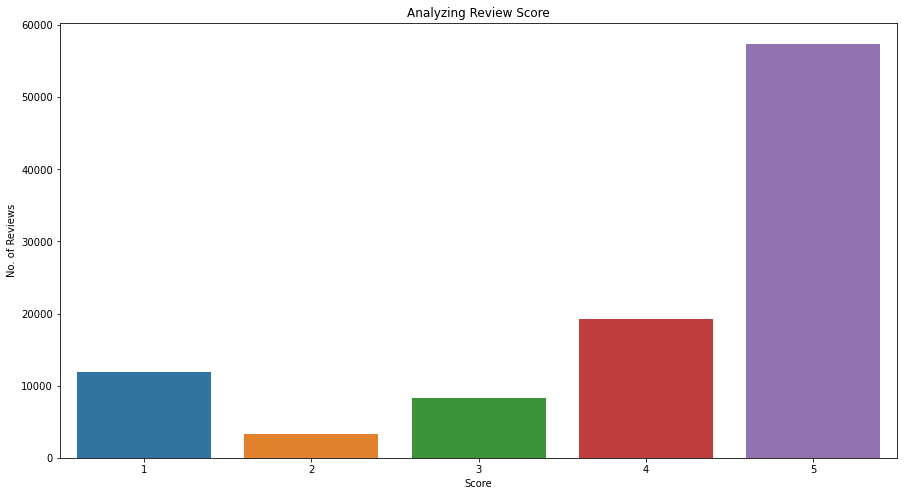

In [676]:
# analyzing the review score
plt.figure(figsize=(15,8))
sns.countplot(x='review_score', data=df_reviews)
plt.title('Analyzing Review Score')
plt.xlabel('Score')
plt.ylabel('No. of Reviews')

In [677]:
df_reviews['review_score'].value_counts()

5    57420
4    19200
1    11858
3     8287
2     3235
Name: review_score, dtype: int64

In [678]:
# checking for missing values
df_reviews.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

### Order Table (olist_orders_dataset)

In [679]:
# viewing the first 5 rows of the dataset
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [680]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [681]:
df_orders["order_purchase_timestamp"] = pd.to_datetime(df_orders["order_purchase_timestamp"], format='%Y-%m-%d %H:%M:%S')
df_orders["order_approved_at"] = pd.to_datetime(df_orders["order_approved_at"], format='%Y-%m-%d %H:%M:%S')
df_orders["order_delivered_carrier_date"] = pd.to_datetime(df_orders["order_delivered_carrier_date"], format='%Y-%m-%d %H:%M:%S')
df_orders["order_delivered_customer_date"] = pd.to_datetime(df_orders["order_delivered_customer_date"], format='%Y-%m-%d %H:%M:%S')
df_orders["order_estimated_delivery_date"] = pd.to_datetime(df_orders["order_estimated_delivery_date"], format='%Y-%m-%d %H:%M:%S')

In [682]:
df_orders['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [683]:
df_orders['order_status'] = df_orders['order_status'].astype('category')

In [684]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  category      
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](5), object(2)
memory usage: 5.4+ MB


In [685]:
#check duplicated row
#By setting keep on False, all duplicates are True.
df_orders.duplicated(keep=False).sum()

0

In [686]:
df_orders.shape

(99441, 8)

In [687]:
# Attempt to find number of null for each columns
df_orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Text(0, 0.5, 'No. of Order')

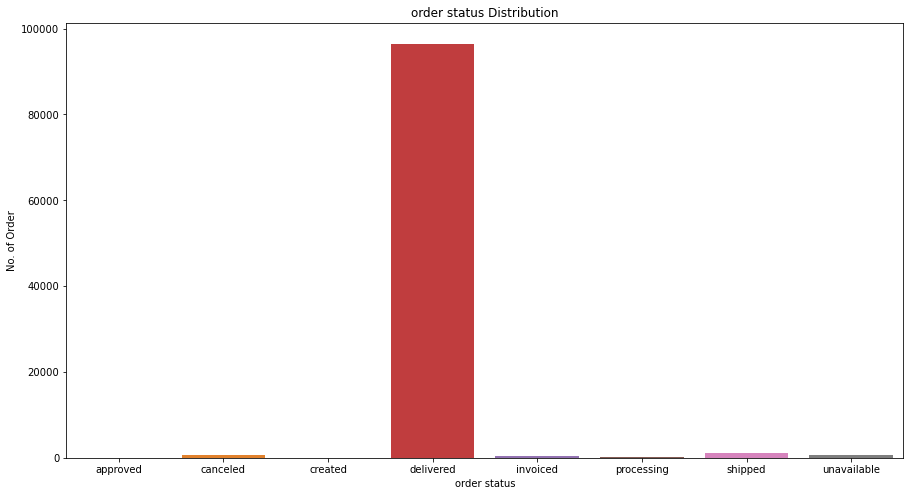

In [688]:
# plotting the category wise distribution of order status
plt.figure(figsize=(15,8))
sns.countplot(x='order_status', data=df_orders)
plt.title('order status Distribution')
plt.xlabel('order status')
plt.ylabel('No. of Order')

In [689]:
df_orders['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [690]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  category      
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](5), object(2)
memory usage: 5.4+ MB


In [691]:
df_orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

### Product (olist_products_dataset) and Product Category Info (product_category_name_translation) Tables

In [692]:
# viewing the first 5 rows of the prodinfo table
df_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [693]:
df_category.shape

(71, 2)

In [694]:
df_category['product_category_name'].unique()

array(['beleza_saude', 'informatica_acessorios', 'automotivo',
       'cama_mesa_banho', 'moveis_decoracao', 'esporte_lazer',
       'perfumaria', 'utilidades_domesticas', 'telefonia',
       'relogios_presentes', 'alimentos_bebidas', 'bebes', 'papelaria',
       'tablets_impressao_imagem', 'brinquedos', 'telefonia_fixa',
       'ferramentas_jardim', 'fashion_bolsas_e_acessorios',
       'eletroportateis', 'consoles_games', 'audio', 'fashion_calcados',
       'cool_stuff', 'malas_acessorios', 'climatizacao',
       'construcao_ferramentas_construcao',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'construcao_ferramentas_jardim', 'fashion_roupa_masculina',
       'pet_shop', 'moveis_escritorio', 'market_place', 'eletronicos',
       'eletrodomesticos', 'artigos_de_festas', 'casa_conforto',
       'construcao_ferramentas_ferramentas', 'agro_industria_e_comercio',
       'moveis_colchao_e_estofado', 'livros_tecnicos', 'casa_construcao',
       'instrumentos_musicais', 'm

In [695]:
# checking for missing values
df_category.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [696]:
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [697]:
df_products.shape

(32951, 9)

In [698]:
df_products['product_category_name'].unique()

array(['perfumaria', 'artes', 'esporte_lazer', 'bebes',
       'utilidades_domesticas', 'instrumentos_musicais', 'cool_stuff',
       'moveis_decoracao', 'eletrodomesticos', 'brinquedos',
       'cama_mesa_banho', 'construcao_ferramentas_seguranca',
       'informatica_acessorios', 'beleza_saude', 'malas_acessorios',
       'ferramentas_jardim', 'moveis_escritorio', 'automotivo',
       'eletronicos', 'fashion_calcados', 'telefonia', 'papelaria',
       'fashion_bolsas_e_acessorios', 'pcs', 'casa_construcao',
       'relogios_presentes', 'construcao_ferramentas_construcao',
       'pet_shop', 'eletroportateis', 'agro_industria_e_comercio', nan,
       'moveis_sala', 'sinalizacao_e_seguranca', 'climatizacao',
       'consoles_games', 'livros_interesse_geral',
       'construcao_ferramentas_ferramentas',
       'fashion_underwear_e_moda_praia', 'fashion_roupa_masculina',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'industria_comercio_e_negocios', 'telefonia_fixa',
   

In [699]:
# merging the product and prodinfo tables
df_products = df_products.merge(df_category, on='product_category_name')

In [700]:
# viewing the first 5 rows of the products table
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery


In [701]:
df_products.shape

(32328, 10)

In [702]:
# dropping the columns
df_products = df_products.drop(columns=['product_category_name'])

In [703]:
# checking for missing values
df_products.isnull().sum()

product_id                       0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 1
product_length_cm                1
product_height_cm                1
product_width_cm                 1
product_category_name_english    0
dtype: int64

In [704]:
df_products['product_category_name_english'] = df_products['product_category_name_english'].astype('category')

In [705]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32328 entries, 0 to 32327
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   product_id                     32328 non-null  object  
 1   product_name_lenght            32328 non-null  float64 
 2   product_description_lenght     32328 non-null  float64 
 3   product_photos_qty             32328 non-null  float64 
 4   product_weight_g               32327 non-null  float64 
 5   product_length_cm              32327 non-null  float64 
 6   product_height_cm              32327 non-null  float64 
 7   product_width_cm               32327 non-null  float64 
 8   product_category_name_english  32328 non-null  category
dtypes: category(1), float64(7), object(1)
memory usage: 2.3+ MB


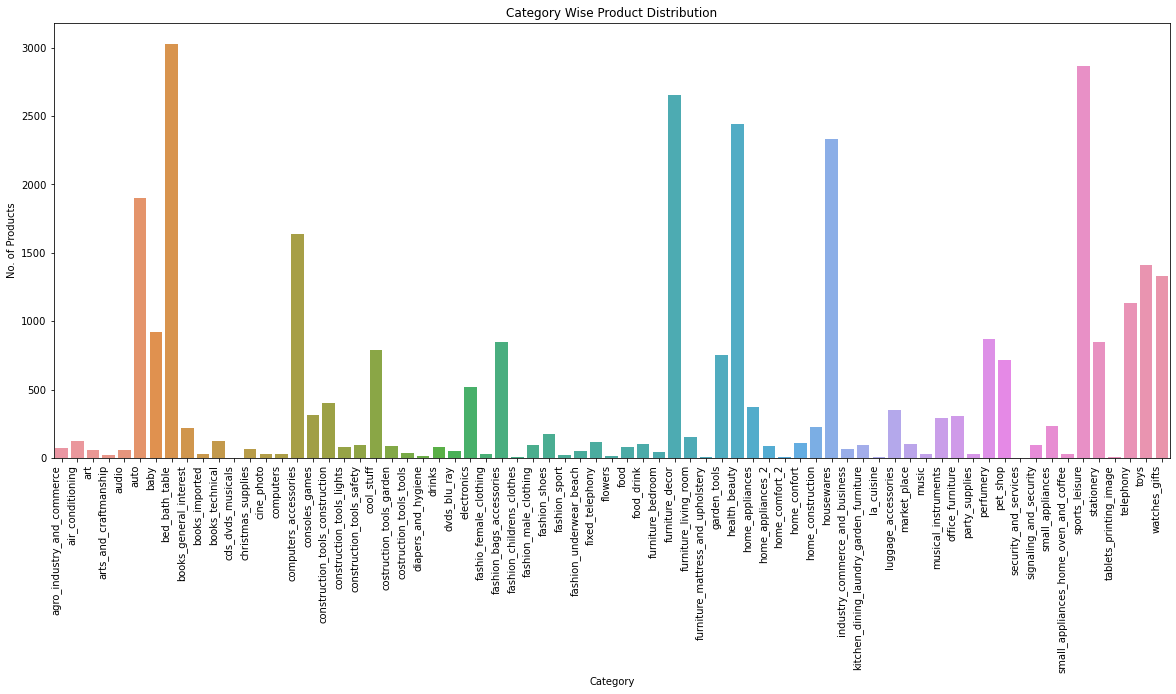

In [706]:
# plotting the category wise distribution of products
plt.figure(figsize=(20,8))
ax=sns.countplot(x='product_category_name_english', data=df_products)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title('Category Wise Product Distribution')
plt.xlabel('Category')
plt.ylabel('No. of Products')
plt.show()

Text(0.5, 0, 'Product Name Length')

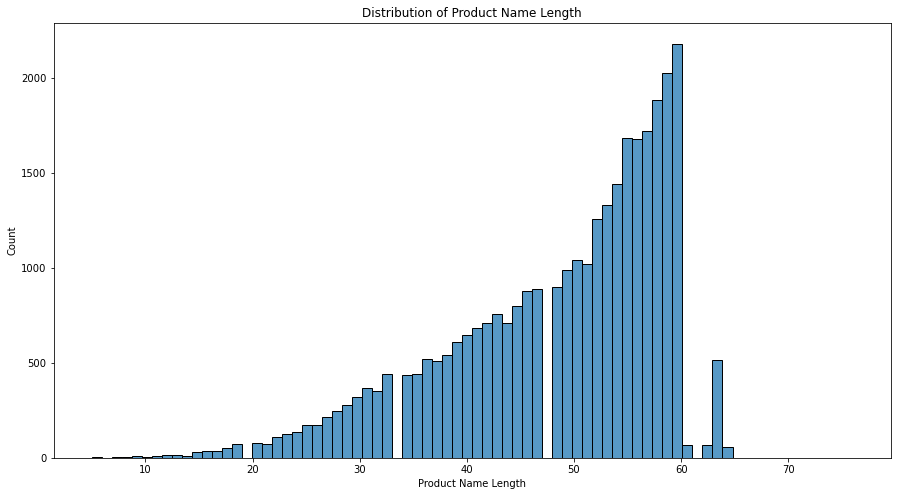

In [707]:
# plotting the distribution of product name length
plt.figure(figsize=(15,8))
sns.histplot(x='product_name_lenght', data=df_products)
plt.title('Distribution of Product Name Length')
plt.xlabel('Product Name Length')

Text(0.5, 0, 'Product Description Length')

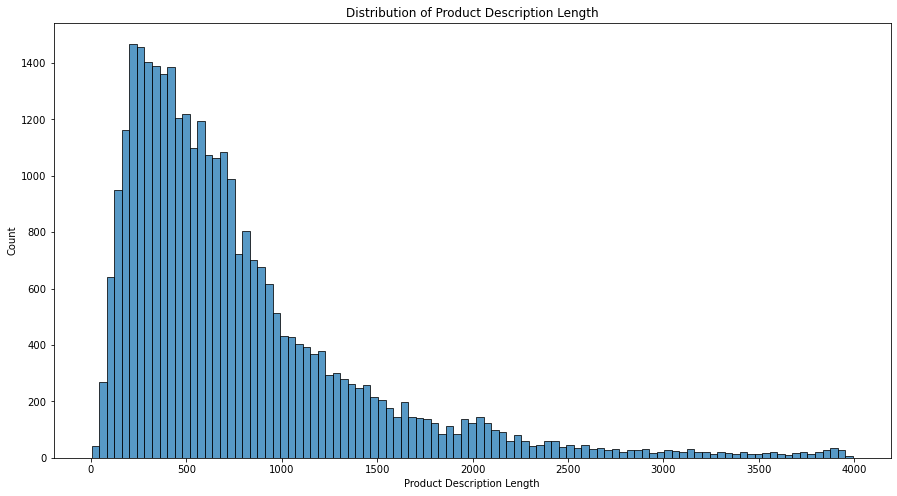

In [708]:
# plotting the distribution of product description length
plt.figure(figsize=(15,8))
sns.histplot(x='product_description_lenght', data=df_products)
plt.title('Distribution of Product Description Length')
plt.xlabel('Product Description Length')

Text(0.5, 0, 'Product Photos Quantity')

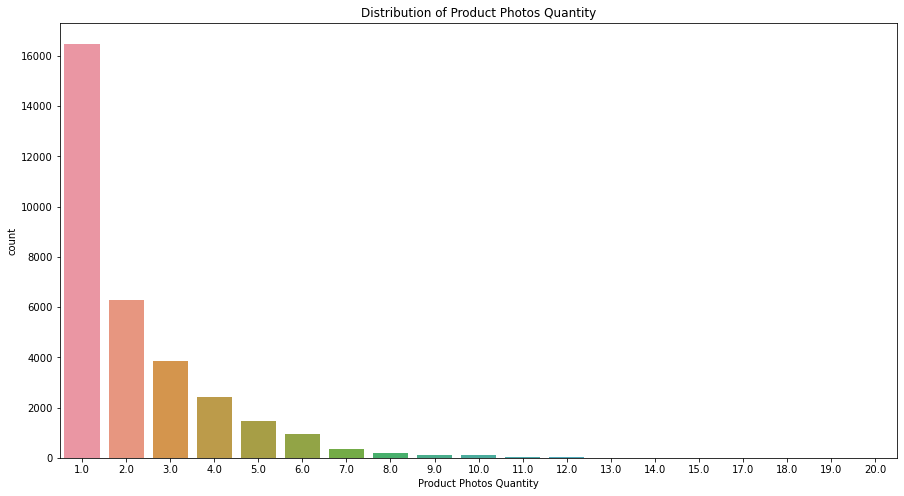

In [709]:
# plotting the distribution of product photos quantity
plt.figure(figsize=(15,8))
sns.countplot(x='product_photos_qty', data=df_products)
plt.title('Distribution of Product Photos Quantity')
plt.xlabel('Product Photos Quantity')

In [710]:
df_products.shape

(32328, 9)

### Seller Table (olist_sellers_dataset)

In [711]:
# viewing the first 5 rows of the table
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [712]:
# checking for missing values
df_sellers.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [713]:
df_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [714]:
df_sellers['seller_zip_code_prefix'] = df_sellers['seller_zip_code_prefix'].astype('category')
df_sellers['seller_city'] = df_sellers['seller_city'].astype('category')
df_sellers['seller_state'] = df_sellers['seller_state'].astype('category')

In [715]:
df_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   seller_id               3095 non-null   object  
 1   seller_zip_code_prefix  3095 non-null   category
 2   seller_city             3095 non-null   category
 3   seller_state            3095 non-null   category
dtypes: category(3), object(1)
memory usage: 143.2+ KB


Text(0, 0.5, 'No. of Sellers')

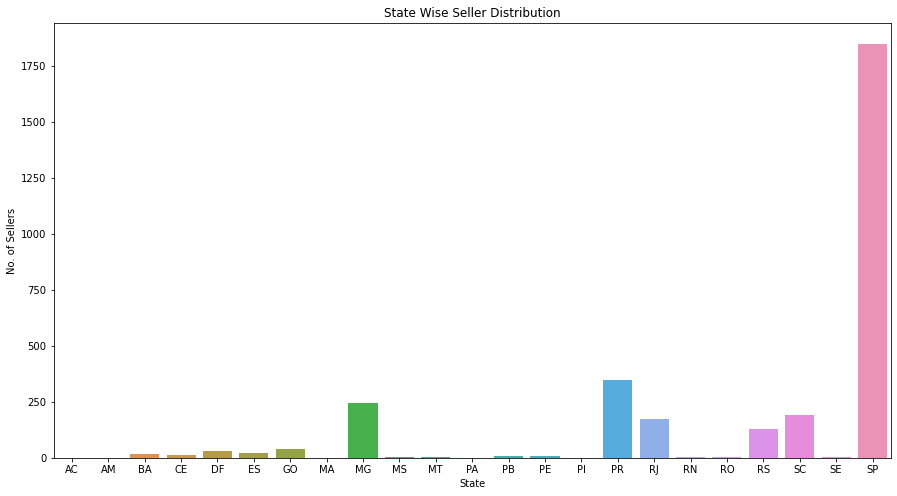

In [716]:
# plotting state wise seller distribution
plt.figure(figsize=(15,8))
sns.countplot(x='seller_state', data=df_sellers)
plt.title('State Wise Seller Distribution')
plt.xlabel('State')
plt.ylabel('No. of Sellers')

In [717]:
df_sellers.shape

(3095, 4)

## Merging the Datasets

### Step 1: Merging customer data set with a Geolocation first

In [718]:
df = pd.merge(df_customers,df_geolocation,left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='inner')
df.rename(columns={
    'geolocation_lat' : 'customer_lat',
    'geolocation_lng' : 'customer_lng',
}, inplace=True)
df.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,customer_lat,customer_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,14409,-20.509897,-47.397866,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,14409,-20.497396,-47.399241,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,14409,-20.510459,-47.399553,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,14409,-20.480940,-47.394161,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,14409,-20.515413,-47.398194,franca,SP


In [719]:
# dropping columns with unnecessary column
df = df.drop(columns=['customer_lat','customer_lng','geolocation_state','geolocation_city','geolocation_zip_code_prefix'])

In [720]:
df.duplicated(subset=['customer_id'],keep='last').sum()

10228565

In [721]:
df=df.drop_duplicates(subset=['customer_id'],keep='last')
df

,customer_id,customer_zip_code_prefix,customer_city,customer_state
125,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP
251,5dca924cc99eea2dc5ba40d11ec5dd0f,14409,franca,SP
377,661897d4968f1b59bfff74c7eb2eb4fc,14409,franca,SP
503,702b62324327ccba20f1be3465426437,14409,franca,SP
629,bdf997bae7ca819b0415f5174d6b4302,14409,franca,SP
...,...,...,...,...
10327706,0b7a30ba373aeb55cf28add5b5477956,87145,paicandu,PR
10327711,ff6b440b2465bfaef05c675efb48cd15,98860,eugenio de castro,RS
10327718,3f7029d9b98a47370cd5f3a97adcbccd,5538,sao paulo,SP
10327726,d9110683c7a282144e9fc97660026a28,74980,aparecida de goiania,GO


### Step 2: Merging seller data set with a geolocation data set

In [722]:
df2 = pd.merge(df_sellers, df_geolocation, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix')
df2.rename(columns={
    'geolocation_lat' : 'seller_lat',
    'geolocation_lng' : 'sellet_lng',
}, inplace=True)
df2

,seller_id,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,seller_lat,sellet_lng,geolocation_city,geolocation_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023,-22.898536,-47.063125,campinas,SP
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023,-22.895499,-47.061944,campinas,SP
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023,-22.891740,-47.060820,campinas,SP
3,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023,-22.895762,-47.066144,campinas,SP
4,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023,-22.896154,-47.062431,campinas,SP
...,...,...,...,...,...,...,...,...,...
311784,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP,12051,-23.011130,-45.592347,taubate,SP
311785,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP,12051,-23.013452,-45.584299,taubaté,SP
311786,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP,12051,-23.009155,-45.592019,taubate,SP
311787,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP,12051,-23.009019,-45.584925,taubate,SP


In [723]:
# dropping columns with unnecessary column
df2 = df2.drop(columns=['seller_lat','sellet_lng','geolocation_state','geolocation_city','geolocation_zip_code_prefix'])

In [724]:
df2.duplicated(subset=['seller_id'],keep='last').sum()

308701

In [725]:
df2=df2.drop_duplicates(subset=['seller_id'],keep='last')
df2

,seller_id,seller_zip_code_prefix,seller_city,seller_state
57,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
115,e0eabded302882513ced4ea3eb0c7059,13023,campinas,SP
206,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
304,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
402,1d2732ef8321502ee8488e8bed1ab8cd,20031,rio de janeiro,RJ
...,...,...,...,...
311532,f1fdf2d13186575751aa25876536d85c,5314,sao paulo,SP
311594,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
311639,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
311723,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


### Step 3: Merging all data set together

In [726]:
df_final = pd.merge(df_item,df_products, on='product_id', how='inner')
df_final = df_final.merge(df2, on='seller_id', how='inner')
df_final = df_final.merge(df_orders, on='order_id', how='inner')
df_final = df_final.merge(df_order_pay, on='order_id', how='inner')
df_final = df_final.merge(df, on='customer_id', how='inner')
df_final = df_final.merge(df_reviews, on='order_id', how='inner')

In [727]:
df_final.shape

(116007, 36)

In [728]:
df_final.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,...,payment_type,payment_installments,payment_value,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,58.0,598.0,4.0,...,credit_card,2,72.19,28013,campos dos goytacazes,RJ,97ca439bc427b48bc1cd7177abe71365,5,2017-09-21,2017-09-22 10:57:03
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,58.0,598.0,4.0,...,boleto,1,73.86,75800,jatai,GO,b11cba360bbe71410c291b764753d37f,5,2017-07-14,2017-07-17 12:50:07
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,58.0,598.0,4.0,...,credit_card,2,83.23,30720,belo horizonte,MG,af01c4017c5ab46df6cc810e069e654a,4,2018-06-05,2018-06-06 21:41:12
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,58.0,598.0,4.0,...,credit_card,3,75.07,83070,sao jose dos pinhais,PR,8304ff37d8b16b57086fa283fe0c44f8,5,2017-08-10,2017-08-13 03:35:17
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,58.0,598.0,4.0,...,credit_card,4,72.19,36400,conselheiro lafaiete,MG,426f43a82185969503fb3c86241a9535,5,2017-08-25,2017-08-28 00:51:18


In [729]:
df_final.duplicated(keep=False).sum()

0

In [730]:
df_final.describe()

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix,review_score
count,116007.000000,116007.000000,116007.000000,116007.000000,116007.000000,116007.000000,116006.000000,116006.000000,116006.000000,116006.000000,116007.000000,116007.000000,116007.000000,116007.000000,116007.000000,116007.000000
mean,1.197117,120.782909,20.055148,48.754110,786.016404,2.199979,2114.007888,30.311458,16.666052,23.107874,24512.540631,1.093675,2.947900,172.936161,34975.729628,4.017370
std,0.702168,184.052353,15.859804,10.037875,653.245347,1.712903,3778.573482,16.215368,13.485268,11.734252,27632.744820,0.728921,2.782784,267.958699,29805.562138,1.397992
min,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000,1.000000,0.000000,0.000000,1003.000000,1.000000
25%,1.000000,39.900000,13.080000,42.000000,345.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000,1.000000,1.000000,60.900000,11250.000000,4.000000
50%,1.000000,74.900000,16.320000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,13720.000000,1.000000,2.000000,108.110000,24230.000000,5.000000
75%,1.000000,134.900000,21.200000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,27972.000000,1.000000,4.000000,189.710000,58200.000000,5.000000
max,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000,29.000000,24.000000,13664.080000,99980.000000,5.000000


In [731]:
df_final.describe(include=['category'])

,product_category_name_english,seller_city,seller_state,order_status,payment_type,customer_city,customer_state
count,116007,116007,116007,116007,116007,116007,116007
unique,71,604,23,7,4,4046,27
top,bed_bath_table,sao paulo,SP,delivered,credit_card,sao paulo,SP
freq,11962,28840,82744,113510,85566,18369,49018


In [732]:
df_final.describe(include=['object'])

,order_id,product_id,seller_id,customer_id,review_id
count,116007,116007,116007,116007,116007
unique,96773,32220,3026,96773,96572
top,895ab968e7bb0d5659d16cd74cd1650c,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,270c23a11d024a44c896d1894b261a83,eef5dbca8d37dfce6db7d7b16dd0525e
freq,63,534,2153,63,63


## Deal with missing data

In [733]:
#ตรวจชนิดของข้อมูล
#data.dtypes
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116007 entries, 0 to 116006
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       116007 non-null  object        
 1   order_item_id                  116007 non-null  int64         
 2   product_id                     116007 non-null  object        
 3   seller_id                      116007 non-null  object        
 4   shipping_limit_date            116007 non-null  datetime64[ns]
 5   price                          116007 non-null  float64       
 6   freight_value                  116007 non-null  float64       
 7   product_name_lenght            116007 non-null  float64       
 8   product_description_lenght     116007 non-null  float64       
 9   product_photos_qty             116007 non-null  float64       
 10  product_weight_g               116006 non-null  float64       
 11  

In [734]:
df_final['seller_zip_code_prefix'] = df_final['seller_zip_code_prefix'].astype('category')
df_final['customer_zip_code_prefix'] = df_final['customer_zip_code_prefix'].astype('category')

In [735]:
# Attempt to find number of null for each columns
df_final.isnull().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_name_lenght                 0
product_description_lenght          0
product_photos_qty                  0
product_weight_g                    1
product_length_cm                   1
product_height_cm                   1
product_width_cm                    1
product_category_name_english       0
seller_zip_code_prefix              0
seller_city                         0
seller_state                        0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  14
order_delivered_carrier_date     1202
order_delivered_customer_date    2498
order_estimated_delivery_date       0
payment_sequential                  0
payment_type

In [736]:
df_final[df_final.isna().any(axis=1)]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,...,payment_type,payment_installments,payment_value,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_creation_date,review_answer_timestamp
15,bf3b217e5505e5e9d746120dbb93b562,1,ec02a5d380128f7a188e9ce8f3ddd832,48436dade18ac8b2bce089ec2a041202,2017-08-30 07:25:13,132.9,18.18,59.0,599.0,2.0,...,credit_card,4,151.08,6874,itapecerica da serra,SP,ad04c464738a477312422d0f3af40ddb,1,2017-09-20,2017-09-22 15:40:19
33,8e78a66489b3861f846342d4b158c8f4,1,2423252b2432f1803e4f29e0974c6cf7,48436dade18ac8b2bce089ec2a041202,2017-10-09 19:14:27,139.9,18.23,60.0,919.0,5.0,...,credit_card,2,158.13,8257,sao paulo,SP,24e246eb9d4e370b9014b9e58f24a1f3,1,2017-10-28,2017-10-30 09:52:13
61,1856dd06ccd053bf3456e3d5bf73f2e3,1,54e5939fcd9ae70ad0f59f612d6d29bd,48436dade18ac8b2bce089ec2a041202,2017-10-05 20:23:08,42.9,16.11,51.0,471.0,4.0,...,credit_card,2,59.01,37545,cachoeira de minas,MG,ee980f7f9ee2ece60af3bd00f62b7449,1,2017-10-29,2017-10-30 17:58:37
161,afef48d3c8a0b1b7c9b7f8f922fb5674,1,31945c8811d04df20bf86224210b4084,48436dade18ac8b2bce089ec2a041202,2017-11-17 16:50:47,134.9,18.51,48.0,919.0,5.0,...,credit_card,5,153.41,96600,cangucu,RS,dfaf49a4644a9b5afcc050667c3d2255,1,2017-12-08,2017-12-12 01:50:24
181,088683f795a3d30bfd61152c4fabdfb2,1,86742dc5c815f1c8c04c6e323e3c1865,dd7ddc04e1b6c2c614352b383efe2d36,2017-07-20 02:25:54,29.9,16.92,37.0,734.0,10.0,...,boleto,1,46.82,78138,varzea grande,MT,903db4bec5b321c64960b1fba1fe0b1b,1,2017-08-17,2017-08-17 13:02:46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115994,fc3078fa5d882e59237a658341f57738,1,decdbf117444f265f4400886439f5fd7,b57e8460909fa137df7951b4a3b5ea84,2017-03-08 08:05:18,99.0,42.07,27.0,336.0,2.0,...,credit_card,1,282.14,4288,sao paulo,SP,06ca23fe7c7c38193969c38098aca1bd,2,2017-03-29,2017-03-31 10:06:46
115995,fc32248629afaea92d59f7086de552d3,1,9754ea6652dc3e06be088797f85f4ee5,7a188843479798ca813108fa7b959286,2017-11-28 02:46:53,49.9,8.72,48.0,222.0,4.0,...,boleto,1,175.86,9015,santo andre,SP,81be3d46fabf3575cc1544ea854549de,1,2017-12-06,2017-12-06 13:36:56
115996,fc32248629afaea92d59f7086de552d3,2,9754ea6652dc3e06be088797f85f4ee5,7a188843479798ca813108fa7b959286,2017-11-28 02:46:53,49.9,8.72,48.0,222.0,4.0,...,boleto,1,175.86,9015,santo andre,SP,81be3d46fabf3575cc1544ea854549de,1,2017-12-06,2017-12-06 13:36:56
115997,fc32248629afaea92d59f7086de552d3,3,9754ea6652dc3e06be088797f85f4ee5,7a188843479798ca813108fa7b959286,2017-11-28 02:46:53,49.9,8.72,48.0,222.0,4.0,...,boleto,1,175.86,9015,santo andre,SP,81be3d46fabf3575cc1544ea854549de,1,2017-12-06,2017-12-06 13:36:56


In [737]:
df_final['review_score'].value_counts()

5    65153
4    21910
1    15038
3     9788
2     4118
Name: review_score, dtype: int64

### Feature Engineering

In [738]:
df_final['Seller packing duration']=(df_final.order_delivered_carrier_date-df_final.shipping_limit_date).dt.days
df_final['Approved duration']=(df_final.order_approved_at-df_final.order_purchase_timestamp).dt.seconds
df_final['Delivery performance']=(df_final.order_delivered_customer_date-df_final.order_estimated_delivery_date).dt.days
df_final['Total shipping date']=(df_final.order_delivered_customer_date-df_final.order_delivered_carrier_date).dt.days
df_final['Ideal total shipping date']=(df_final.order_estimated_delivery_date-df_final.order_delivered_carrier_date).dt.days

In [739]:
df_final.drop(columns=df_final.select_dtypes(include=['datetime64[ns]']),inplace=True)
df_final.drop(columns=df_final.select_dtypes(include=['object']),inplace=True)

In [740]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116007 entries, 0 to 116006
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   order_item_id                  116007 non-null  int64   
 1   price                          116007 non-null  float64 
 2   freight_value                  116007 non-null  float64 
 3   product_name_lenght            116007 non-null  float64 
 4   product_description_lenght     116007 non-null  float64 
 5   product_photos_qty             116007 non-null  float64 
 6   product_weight_g               116006 non-null  float64 
 7   product_length_cm              116006 non-null  float64 
 8   product_height_cm              116006 non-null  float64 
 9   product_width_cm               116006 non-null  float64 
 10  product_category_name_english  116007 non-null  category
 11  seller_zip_code_prefix         116007 non-null  category
 12  seller_city     

In [741]:
df_final.isnull().sum()

order_item_id                       0
price                               0
freight_value                       0
product_name_lenght                 0
product_description_lenght          0
product_photos_qty                  0
product_weight_g                    1
product_length_cm                   1
product_height_cm                   1
product_width_cm                    1
product_category_name_english       0
seller_zip_code_prefix              0
seller_city                         0
seller_state                        0
order_status                        0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
review_score                        0
Seller packing duration          1202
Approved duration                  14
Delivery performance             2498
Total shippi

In [742]:
df_final.describe()

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,review_score,Seller packing duration,Approved duration,Delivery performance,Total shipping date,Ideal total shipping date
count,116007.000000,116007.000000,116007.000000,116007.000000,116007.000000,116007.000000,116006.000000,116006.000000,116006.000000,116006.000000,116007.000000,116007.000000,116007.000000,116007.000000,114805.000000,115993.000000,113509.000000,113508.000000,114805.000000
mean,1.197117,120.782909,20.055148,48.754110,786.016404,2.199979,2114.007888,30.311458,16.666052,23.107874,1.093675,2.947900,172.936161,4.017370,-3.826515,14359.419465,-12.062339,8.740177,20.218544
std,0.702168,184.052353,15.859804,10.037875,653.245347,1.712903,3778.573482,16.215368,13.485268,11.734252,0.728921,2.782784,267.958699,1.397992,5.754831,23865.757018,10.159970,8.618473,8.813967
min,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,0.000000,0.000000,1.000000,-1047.000000,0.000000,-147.000000,-17.000000,-91.000000
25%,1.000000,39.900000,13.080000,42.000000,345.000000,1.000000,300.000000,18.000000,8.000000,15.000000,1.000000,1.000000,60.900000,4.000000,-6.000000,756.000000,-17.000000,4.000000,14.000000
50%,1.000000,74.900000,16.320000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,1.000000,2.000000,108.110000,5.000000,-4.000000,1173.000000,-13.000000,7.000000,20.000000
75%,1.000000,134.900000,21.200000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,1.000000,4.000000,189.710000,5.000000,-2.000000,17491.000000,-7.000000,11.000000,25.000000
max,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,29.000000,24.000000,13664.080000,5.000000,95.000000,86399.000000,188.000000,205.000000,192.000000


In [743]:
df_final['Approved duration'] = df_final['Approved duration'].fillna(90000)
df_final['Delivery performance'] = df_final['Delivery performance'].fillna(400)
df_final['Total shipping date'] = df_final['Total shipping date'].fillna(400)
df_final['Ideal total shipping date'] = df_final['Ideal total shipping date'].fillna(400)
df_final['Seller packing duration'] = df_final['Seller packing duration'].fillna(400)

In [744]:
df_final.isnull().sum()

order_item_id                    0
price                            0
freight_value                    0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 1
product_length_cm                1
product_height_cm                1
product_width_cm                 1
product_category_name_english    0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
order_status                     0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
review_score                     0
Seller packing duration          0
Approved duration                0
Delivery performance             0
Total shipping date              0
Ideal total shipping date        0
dtype: int64

In [745]:
df_final=df_final.dropna()

In [746]:
df_final.shape

(116006, 28)

In [747]:
df_final['order_status'].value_counts()

delivered      113509
shipped          1219
canceled          547
processing        361
invoiced          360
unavailable         7
approved            3
created             0
Name: order_status, dtype: int64

In [748]:
corr = df_final.corr()
corr['review_score']

order_item_id                -0.131057
price                        -0.005968
freight_value                -0.038733
product_name_lenght          -0.006099
product_description_lenght    0.009652
product_photos_qty            0.022331
product_weight_g             -0.030750
product_length_cm            -0.022892
product_height_cm            -0.028006
product_width_cm             -0.013003
payment_sequential           -0.003677
payment_installments         -0.043509
payment_value                -0.084515
review_score                  1.000000
Seller packing duration      -0.188845
Approved duration            -0.013560
Delivery performance         -0.272499
Total shipping date          -0.274800
Ideal total shipping date    -0.176823
Name: review_score, dtype: float64

## Preprocessing & Split the data

In [749]:
# เตรียมข้อมูลก่อนทำการ Training โดยการแยก Training Data ออกจาก Target Data

X = df_final.drop(columns='review_score')
y = df_final['review_score']

In [750]:
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import OneHotEncoder ,OrdinalEncoder
from sklearn.pipeline import Pipeline

In [751]:
X.columns

Index(['order_item_id', 'price', 'freight_value', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'order_status', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'Seller packing duration', 'Approved duration', 'Delivery performance',
       'Total shipping date', 'Ideal total shipping date'],
      dtype='object')

In [752]:
Ordinal= ['seller_city','seller_state','order_status','payment_type','customer_city','customer_state','product_category_name_english','seller_zip_code_prefix','customer_zip_code_prefix']
edc= preprocessing.OrdinalEncoder(dtype=np.int64)
X[Ordinal] = edc.fit_transform(X[Ordinal])

In [753]:
X

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,...,payment_installments,payment_value,customer_zip_code_prefix,customer_city,customer_state,Seller packing duration,Approved duration,Delivery performance,Total shipping date,Ideal total shipping date
0,1,58.9,13.29,58.0,598.0,4.0,650.0,28.0,9.0,14.0,...,2,72.19,6600,729,18,0.0,2793.0,-9.0,1.0,9.0
1,1,55.9,17.96,58.0,598.0,4.0,650.0,28.0,9.0,14.0,...,1,73.86,11893,1918,8,0.0,53511.0,-13.0,8.0,20.0
2,1,64.9,18.33,58.0,598.0,4.0,650.0,28.0,9.0,14.0,...,2,83.23,7079,446,10,0.0,7550.0,-3.0,12.0,14.0
3,1,58.9,16.17,58.0,598.0,4.0,650.0,28.0,9.0,14.0,...,3,75.07,12698,3492,17,-5.0,986.0,-16.0,7.0,22.0
4,1,58.9,13.29,58.0,598.0,4.0,650.0,28.0,9.0,14.0,...,4,72.19,7696,1022,10,-6.0,991.0,-8.0,13.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116002,1,119.9,16.14,44.0,533.0,2.0,1000.0,69.0,11.0,11.0,...,1,136.04,5855,3097,18,7.0,67777.0,2.0,19.0,17.0
116003,1,209.0,16.21,32.0,1306.0,3.0,500.0,17.0,9.0,25.0,...,1,225.21,4526,2064,25,-3.0,60005.0,-18.0,2.0,20.0
116004,1,6729.0,193.21,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,...,1,6922.21,6770,4014,7,1.0,35696.0,5.0,12.0,6.0
116005,1,27.9,14.44,28.0,242.0,1.0,2000.0,19.0,38.0,19.0,...,1,84.68,4085,605,25,-1.0,1373.0,-10.0,2.0,11.0


In [754]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116006 entries, 0 to 116006
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_item_id                  116006 non-null  int64  
 1   price                          116006 non-null  float64
 2   freight_value                  116006 non-null  float64
 3   product_name_lenght            116006 non-null  float64
 4   product_description_lenght     116006 non-null  float64
 5   product_photos_qty             116006 non-null  float64
 6   product_weight_g               116006 non-null  float64
 7   product_length_cm              116006 non-null  float64
 8   product_height_cm              116006 non-null  float64
 9   product_width_cm               116006 non-null  float64
 10  product_category_name_english  116006 non-null  int64  
 11  seller_zip_code_prefix         116006 non-null  int64  
 12  seller_city                   

In [755]:
#Train:Test = 75:25
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state = 0)

In [756]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((87004, 27), (29002, 27), (87004,), (29002,))

In [757]:
X_train.select_dtypes(include=['float64'])

,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_value,Seller packing duration,Approved duration,Delivery performance,Total shipping date,Ideal total shipping date
17124,12.99,7.39,58.0,138.0,1.0,100.0,18.0,3.0,13.0,47.67,-6.0,65774.0,-8.0,0.0,8.0
45195,38.90,16.79,35.0,1101.0,2.0,250.0,42.0,2.0,30.0,50.94,-3.0,790.0,-15.0,12.0,27.0
38388,52.50,24.86,24.0,290.0,2.0,600.0,50.0,12.0,50.0,154.72,-3.0,4387.0,-12.0,17.0,29.0
43404,49.90,7.05,51.0,2526.0,1.0,200.0,16.0,16.0,11.0,113.90,0.0,1185.0,-14.0,1.0,15.0
13749,89.00,16.38,53.0,495.0,2.0,1874.0,38.0,38.0,26.0,105.38,-11.0,565.0,-25.0,6.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28246,27.90,16.11,29.0,194.0,1.0,450.0,16.0,42.0,32.0,44.01,-4.0,891.0,-15.0,6.0,21.0
107760,74.90,15.59,55.0,485.0,1.0,1150.0,35.0,15.0,15.0,90.49,-2.0,617.0,-5.0,4.0,8.0
513,169.90,22.99,47.0,539.0,2.0,8750.0,35.0,15.0,35.0,192.89,-1.0,22225.0,-21.0,5.0,26.0
111648,18.90,17.19,43.0,390.0,1.0,1300.0,46.0,7.0,12.0,72.18,-1.0,706.0,-30.0,8.0,37.0


In [758]:
X_train.select_dtypes(include=['float64']).columns

Index(['price', 'freight_value', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'payment_value', 'Seller packing duration', 'Approved duration',
       'Delivery performance', 'Total shipping date',
       'Ideal total shipping date'],
      dtype='object')

In [759]:
from sklearn import tree 
from sklearn.compose import ColumnTransformer

model = tree.DecisionTreeClassifier()
ct = ColumnTransformer(
    [('std', StandardScaler(),X_train.select_dtypes(include=['float64']).columns)],remainder='passthrough')

pipe = Pipeline([('ct', ct), ('DT', model)])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)
print('model score =',model.score(X_train, y_train))

model score = 0.048055261827042436


In [760]:
from sklearn.metrics import accuracy_score
prediction = model.predict(X_test)
print('accuracy =',accuracy_score(y_test, prediction)*100,'%')

accuracy = 4.682435694090063 %


In [761]:
from sklearn.metrics import mean_squared_error
predictions = model.predict(X_train)
forest_mse = mean_squared_error(y_train, predictions)
forest_rmse = np.sqrt(forest_mse)
print('error = ',forest_rmse)

error =  2.59939421014939


In [762]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators=100)

pipe = Pipeline([('ct', ct), ('RF', model2)])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)
print('model score =',model2.score(X_train,y_train))

model score = 0.12406326145924325


In [765]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
model3=OneVsOneClassifier(LinearSVC(random_state=0))

pipe = Pipeline([('ct', ct), ('OneVsOneClassifier', model3)])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)
print('model score =',model3.score(X_train,y_train))

C:\Users\66626\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\66626\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


KeyboardInterrupt: 